
## Dans ce notebook, nous traitons particulierement la convolution d'image par filtre moyenneur, gaussien et median. en suite nous traitons les contours avec les filtres de sobel, Prewitt, Laplacien....

# plus loin on a les cartes contenant les resultats des differents filtre pour comparaison

In [5]:
#Convolution numérique R = I*K
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image #importation du sous-module Image du module PIL
img_gris = Image.open("lena_gris.png")
#img_gris1 = Image.open("lena_ajout_luminance.png")
im = Image.open("lena.png")
img_obscure_gris = Image.open("img_obscure_gris.png")
#img_gris.show()
bruit1 = Image.open("bruit1.png")
img_obscure_gris.show()

In [3]:
def saveImage(matrix):
    file = input("Entrez le nom de votre fichier")
    dim  = matrix.shape
    matrix = np.reshape(matrix,dim[0]*dim[1])
    with open(file+".pgm","a") as f:
        f.writelines("P2\n")
        f.writelines("# Create by Laure\n")
        f.writelines("{} {}\n".format(dim[0],dim[1]))
        
        for i in matrix:
            f.writelines("{}\n".format(i))    
    
    

In [5]:
def readpgm(file):
    """ Cette fonction lit en fichier pgm pour obtenir sa matrice d'image"""
    
    with open(file,"r") as file:
        img = file.readlines()
    lent = img[2]
    lent1 = lent.split(" ")
    lent1 = [int(i) for i in lent1]
    #print(type(lent1[1]))
    imgelt = img[3:]
    img_text = "".join(imgelt)
    #img_text1  ="".join(img_text)
    img_split = img_text.split("\n")
    #print(img_split)
    if '' in img_split:
        img_split.remove('')

    #print(img_split)    
    final_matrix = img_split[1:] 
    #print(final_matrix)
    final_matrix = [int(i) for i in final_matrix]
    img_matrix = np.reshape(final_matrix, (lent1[0],lent1[1]))
    
    return img_matrix

### Le filtrage d'une image numérique permet de modifier son spectre spatial. On peut par exemple chercher à atténuer les hautes fréquences pour la rendre moins nette, à réduire le bruit, ou au contraire à accentuer les hautes fréquences pour accentuer la netteté.


In [3]:
def convolution_numerique(im, b):
    """ cette fonction prend en entree une matrice et le nbre de ligne de la matrice de 
    convolution et retoune l'image convoluee . La taille de la matrice de convolution doit etre impair"""
    #K = np.random.randint(1, size=(taille,taille))
    tab=np.array(im)
    
    dim1,dim2 = tab.shape
    
    tab1=np.zeros((dim1,dim2))
    
    for x in range(dim1-1):
        for y in range(dim2-1):
            tab1[x+1][y+1] = 0
            
            for i in range(len(b)):
                for j in range(len(b)):
                    value =b[j][i]*tab[(x-1+j)][(y-1+i)]
                    tab1[x+1][y+1] = tab1[x+1][y+1]+ value
                    
    """for j in range(dim2):
        tab1[0][j] = 0
        tab1[dim1-1][j] = 0
        tab1[j][0] = 0
        tab1[j][dim1-1] = 0 """
        
    return Image.fromarray(tab1)




def convolution_numerique1(im, b):
    """ cette fonction prend en entree une matrice et le nbre de ligne de la matrice de 
    convolution et retoune l'image convoluee . La taille de la matrice de convolution doit etre impair"""
    #K = np.random.randint(1, size=(taille,taille))
    tab=np.array(im)
    
    dim1,dim2 = tab.shape
    
    tab1=np.zeros((dim1,dim2))
    
    for x in range(dim1-1):
        for y in range(dim2-1):
            tab1[x+1][y+1] = 0
            
            for i in range(len(b)):
                for j in range(len(b)):
                    value =b[j][i]*tab[(x-j)][(y-i)]
                    tab1[x+1][y+1] = tab1[x+1][y+1]+ value
                    
    """for j in range(dim2):
        tab1[0][j] = 0
        tab1[dim1-1][j] = 0
        tab1[j][0] = 0
        tab1[j][dim1-1] = 0 """
        
    return Image.fromarray(tab1)



In [31]:
flou =np.array([[1,1,1],[1,1,1],[1,1,1]])
flou1=np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
perform_bord = np.array([[0,0,0],[-1,1,0],[0,0,0]])

sobelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobely = np.transpose(sobelx)
prewittx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitty = np.transpose(prewittx)

add_contrast = np.array([[0,-1,0],[-1,5,-1],[0,-1,1]])
repoussage = np.array([[-2,1,0],[-1,1,1],[0,1,2]])
detect_border = np.array([[0,1,0],[1,-4,1],[0,1,0]])

moyenneur = (1/9)*flou
moyenneur1 = (1/25)*flou1
gaussien = (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]])
gaussien2 = (1/79)*np.array([[1,2,3,2,1],[2,4,6,4,2],[3,6,9,4,3],[2,4,6,4,2],[1,2,3,2,1]])

laplacien = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacien2=np.array([[1,1,1],[1,-8,1],[1,1,1]])

robertx=np.array([[-1,1]]) 




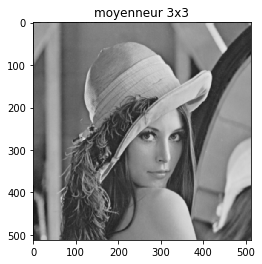

In [15]:
image_convoluee1 = convolution_numerique1(img_gris,moyenneur)
image_convoluee2 = convolution_numerique1(img_gris,moyenneur1)
gaus = convolution_numerique1(img_gris,gaussien)
perform =convolution_numerique1(img_gris,perform_bord)

#image_convoluee.show()
#plt.imshow(image_convoluee)
#plt.imshow(image_convoluee1)

#img_gris.show()

"""fig = plt.figure()
ax = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(image_convoluee1)
ax.set_title('moyenneur 3x3')

ax = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(image_convoluee2)
ax.set_title('moyenneur 5x5')  """
plt.title("moyenneur 3x3")
plt.imshow(image_convoluee1)

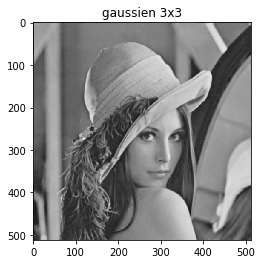

In [55]:
plt.title("gaussien 3x3")
plt.imshow(gaus)

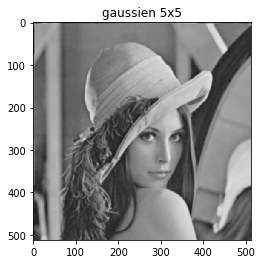

In [11]:
gaus1 = convolution_numerique1(img_gris,gaussien2)
plt.title("gaussien 5x5")
plt.imshow(gaus1)

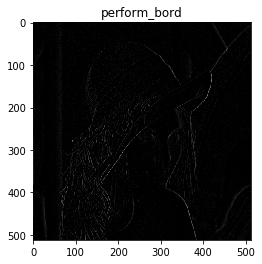

In [12]:
plt.title("perform_bord")
plt.imshow(perform)

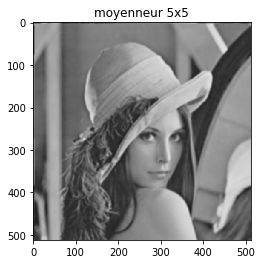

In [13]:
plt.title("moyenneur 5x5")
plt.imshow(image_convoluee2)

####  LE FILTRE MEDIAN, filtre non-lineaire,qui ne peut pas s'implémenter comme un produit de convolution Pour nettoyer le bruit dans une image, il existe mieux que le filtre moyenneur ou le filtre gaussien le principe est remplacer la valeur d'un pixel par la valeur médiane dans son voisinage NxN

In [17]:
def median_filter(im, lent):
    tab=np.array(im)
    dim1,dim2 = tab.shape
    k=int(lent/2)
    tab1=np.zeros((dim1,dim2))
    
    for i in range(k,(dim1-k)):
        
        for j in range(k,(dim2-k)): 
            voisin = tab[i-k:i+k+1,j-k:j+k+1]
            #print(voisin)
            
            tab1[i][j]=np.median(np.reshape(voisin,lent*lent))
            #print("########")
            
    return Image.fromarray(tab1)  
    

In [35]:
median_result2 = median_filter(bruit1, 5)
median_result2.show()
bruit1.show()

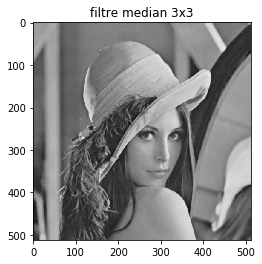

In [6]:
median_result = median_filter(img_gris, 3)
plt.title("filtre median 3x3")
plt.imshow(median_result)



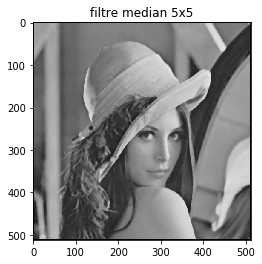

In [8]:
median_result1 = median_filter(img_gris, 5)
plt.title("filtre median 5x5")
plt.imshow(median_result1)

## affichons les resultats pour nos differents filtres a savoir:
### filtre  moyenneur 3x3, 5x5
###  filtre gaussien 3x3, 5x5
### filtre median 3x3, 5x5

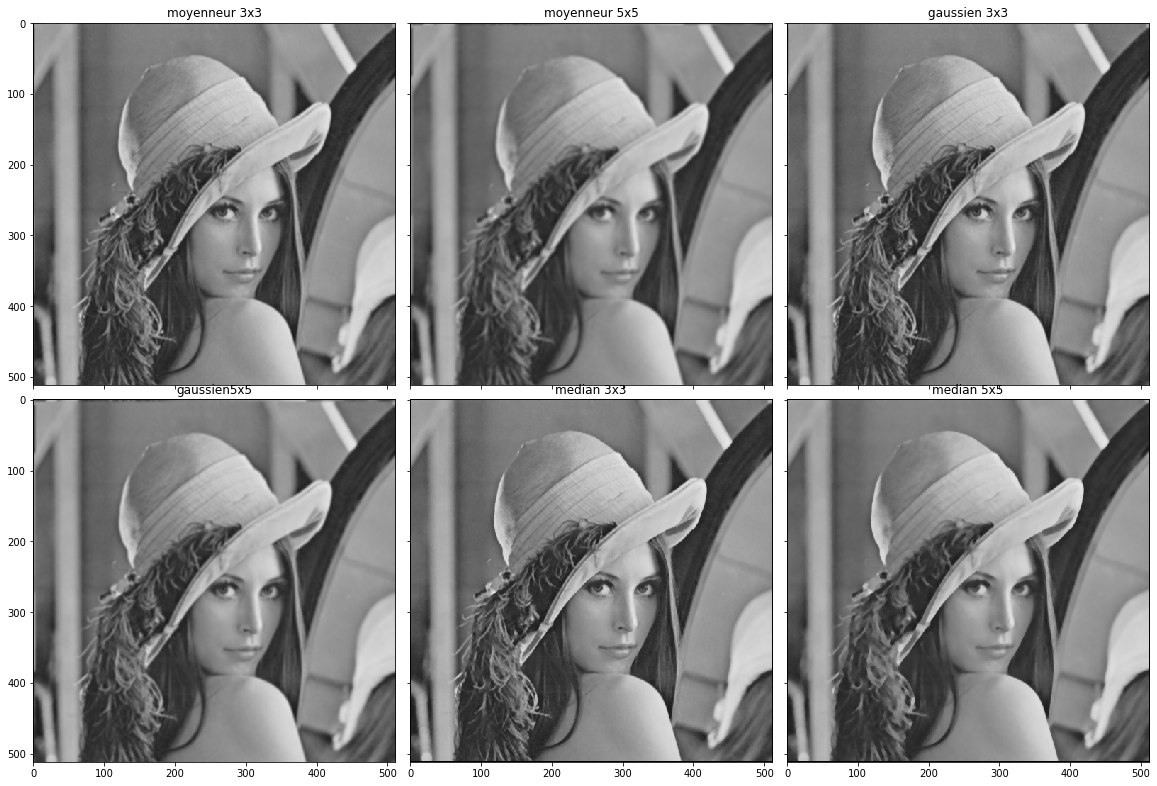

In [51]:
# mettons en place notre grid d'image
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,
                nrows_ncols=(2,3),
                axes_pad = 0.2,)

#image = zip(grid,[image_convoluee1,image_convoluee2,gaus, gaus1,median_result,median_result1])
titre = ["moyenneur 3x3","moyenneur 5x5","gaussien 3x3","gaussien5x5","median 3x3","median 5x5"]
i=0

for ax, im in zip(grid,[image_convoluee1,image_convoluee2,gaus, gaus1,median_result,median_result1]):
    ax.set_title(titre[i], fontdict=None,loc='center')
    i = i+1
    ax.imshow(im)

plt.show()
    

In [38]:
im1 = convolution_numerique1(img_obscure_gris,moyenneur)
im2 = convolution_numerique1(img_obscure_gris,moyenneur1)
im3 = convolution_numerique1(img_obscure_gris,gaussien)
im6 = convolution_numerique1(img_obscure_gris,gaussien2)
im4 = median_filter(img_obscure_gris, 3)
im5 = median_filter(img_obscure_gris, 5)


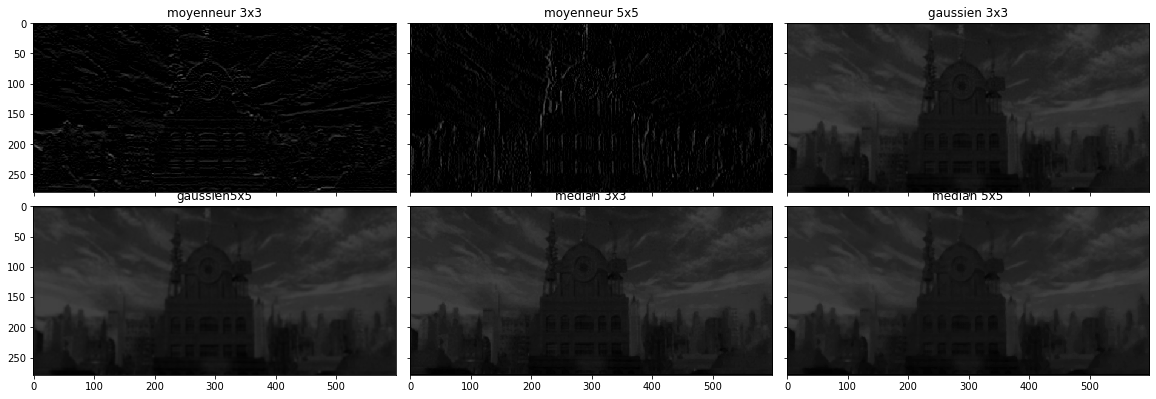

In [50]:
# mettons en place notre grid d'image
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,
                nrows_ncols=(2,3),
                axes_pad = 0.2,)

#image = zip(grid,[image_convoluee1,image_convoluee2,gaus, gaus1,median_result,median_result1])
titre = ["moyenneur 3x3","moyenneur 5x5","gaussien 3x3","gaussien5x5","median 3x3","median 5x5"]
i=0

for ax, im in zip(grid,[im1,im2,im3,im6,im4,im5]):
    ax.set_title(titre[i], fontdict=None,loc='center')
    i = i+1
    ax.imshow(im)

plt.show()
    

In [33]:
#Detection des contours avec les filtres de sobel, prewitt et lapalcien

sx = convolution_numerique1(img_gris,sobelx)
sy = convolution_numerique1(img_gris,sobely)
px = convolution_numerique1(img_gris,prewittx)
py = convolution_numerique1(img_gris,prewitty)
l1 = convolution_numerique1(img_gris,laplacien)
l2= convolution_numerique1(img_gris,laplacien2)


## resultats  de dection des contours avec les filtres de Sobel, Prewitt, Laplacien

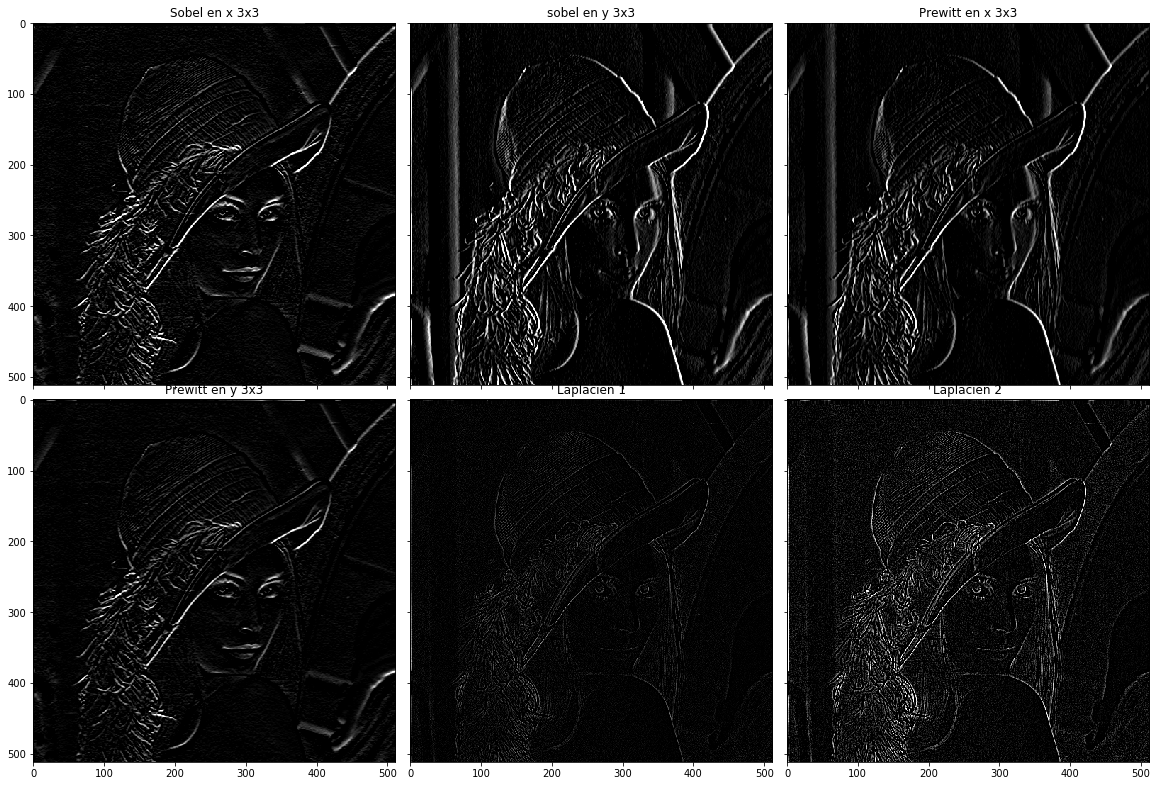

In [36]:
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,
                nrows_ncols=(2,3),
                axes_pad = 0.2,)

#image = zip(grid,[image_convoluee1,image_convoluee2,gaus, gaus1,median_result,median_result1])
titre = ["Sobel en x 3x3","sobel en y 3x3","Prewitt en x 3x3","Prewitt en y 3x3","Laplacien 1","Laplacien 2"]
i=0

for ax, im in zip(grid,[sx,sy,px, py,l1,l2]):
    ax.set_title(titre[i], fontdict=None,loc='center')
    i = i+1
    ax.imshow(im)

plt.show()
    

In [32]:
im7 = convolution_numerique1(img_obscure_gris,sobelx)
im8 = convolution_numerique1(img_obscure_gris,sobely)
im9 = convolution_numerique1(img_obscure_gris,prewittx)
im10 = convolution_numerique1(img_obscure_gris,prewitty)
im11 = convolution_numerique1(img_obscure_gris,laplacien)
im12 = convolution_numerique1(img_obscure_gris,laplacien2)

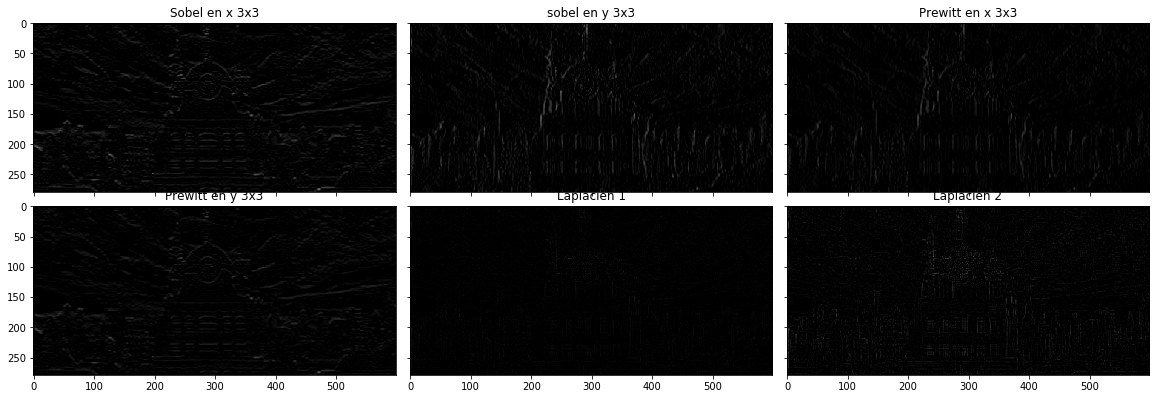

In [43]:
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,
                nrows_ncols=(2,3),
                axes_pad = 0.2,)

#image = zip(grid,[image_convoluee1,image_convoluee2,gaus, gaus1,median_result,median_result1])
titre = ["Sobel en x 3x3","sobel en y 3x3","Prewitt en x 3x3","Prewitt en y 3x3","Laplacien 1","Laplacien 2"]
i=0

for ax, im in zip(grid,[im7,im8,im9, im10,im11,im12]):
    ax.set_title(titre[i], fontdict=None,loc='center')
    i = i+1
    ax.imshow(im)

plt.show()

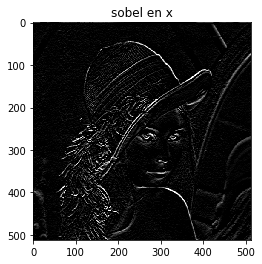

In [62]:
plt.title("sobel en x")
plt.imshow(sx)

In [33]:
# CONTOUR SUR L'IMAGE BRUITEE

im13 = convolution_numerique1(bruit1,sobelx)
im14 = convolution_numerique1(bruit1,sobely)
im15 = convolution_numerique1(bruit1,prewittx)
im16 = convolution_numerique1(bruit1,prewitty)
im17 = convolution_numerique1(bruit1,laplacien)
im18 = convolution_numerique1(bruit1,laplacien2)

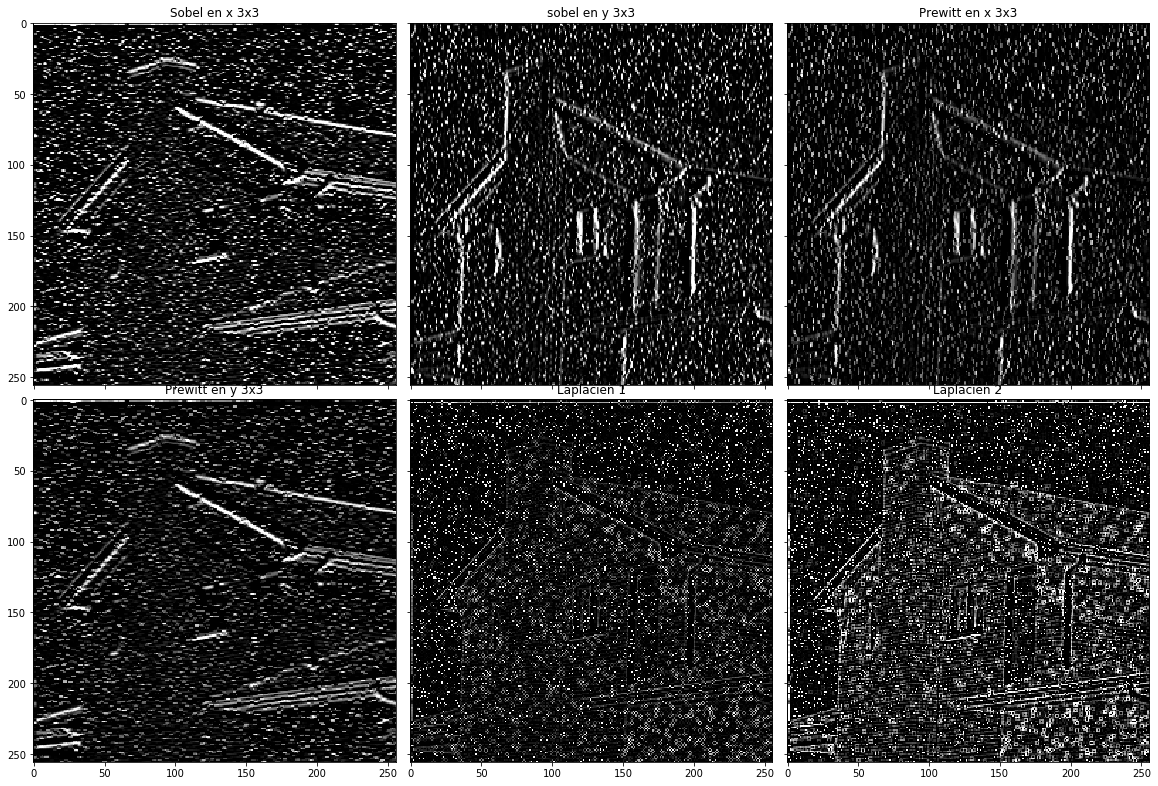

In [34]:
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,
                nrows_ncols=(2,3),
                axes_pad = 0.2,)

#image = zip(grid,[image_convoluee1,image_convoluee2,gaus, gaus1,median_result,median_result1])
titre = ["Sobel en x 3x3","sobel en y 3x3","Prewitt en x 3x3","Prewitt en y 3x3","Laplacien 1","Laplacien 2"]
i=0

for ax, im in zip(grid,[im13,im14,im15,im16,im17,im18]):
    ax.set_title(titre[i], fontdict=None,loc='center')
    i = i+1
    ax.imshow(im)

plt.show()

In [38]:
# CONVOLUTION SUR L'IMAGE NON BRUITEE

im19 = convolution_numerique1(median_result2,sobelx)
im20 = convolution_numerique1(median_result2,sobely)
im21 = convolution_numerique1(median_result2,prewittx)
im22 = convolution_numerique1(median_result2,prewitty)
im23 = convolution_numerique1(median_result2,laplacien)
im24 = convolution_numerique1(median_result2,laplacien2)

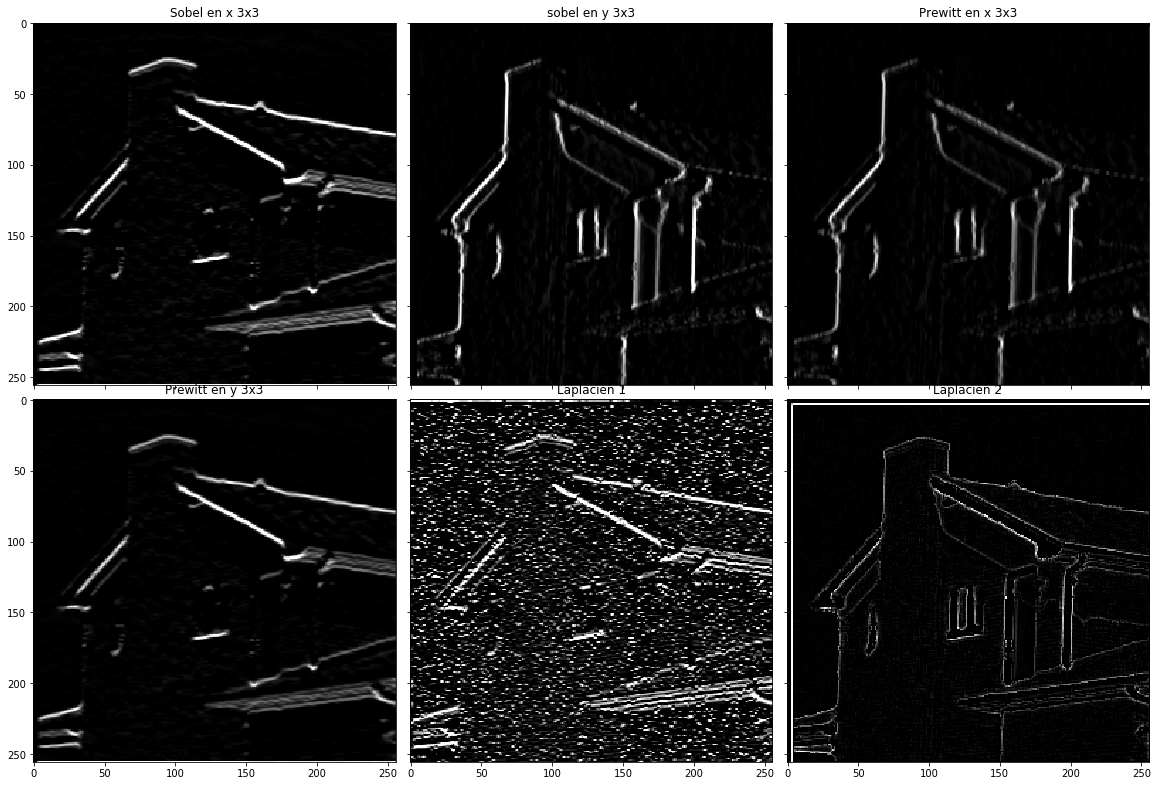

In [39]:
fig = plt.figure(figsize=(20.,20.))
grid = ImageGrid(fig, 111,
                nrows_ncols=(2,3),
                axes_pad = 0.2,)

#image = zip(grid,[image_convoluee1,image_convoluee2,gaus, gaus1,median_result,median_result1])
titre = ["Sobel en x 3x3","sobel en y 3x3","Prewitt en x 3x3","Prewitt en y 3x3","Laplacien 1","Laplacien 2"]
i=0

for ax, im in zip(grid,[im19,im20,im21,im22,im13,im24]):
    ax.set_title(titre[i], fontdict=None,loc='center')
    i = i+1
    ax.imshow(im)

plt.show()

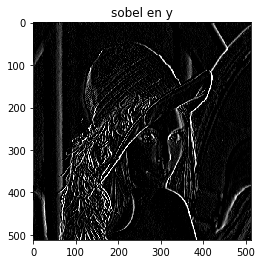

In [63]:
plt.title("sobel en y")
plt.imshow(sy)

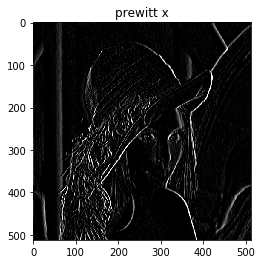

In [64]:
plt.title("prewitt x")
plt.imshow(px)

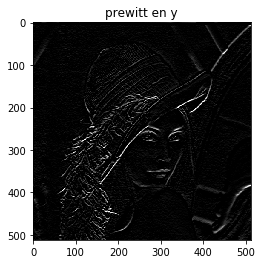

In [65]:
plt.title("prewitt en y")
plt.imshow(py)

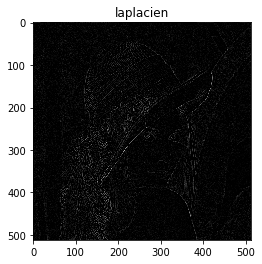

In [69]:
plt.title("laplacien")
plt.imshow(l1)

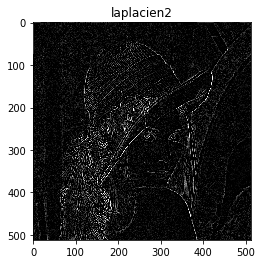

In [78]:
plt.title("laplacien2")
plt.savefig("laplacien2.png")
plt.imshow(l2)

In [41]:
#b = Image.open("test.pgm")